In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

import numpy as np


In [2]:

df1 = pd.read_csv('FINAL_DATA.csv') 

In [3]:

df1.duplicated().sum()

np.int64(44449)

In [4]:
f = pd.read_csv('../frequency.csv')  # Dataset 1 (Signes vitaux, contient timestamp)

In [5]:
df1 = df1.merge(f,on='pid',how='right')

In [4]:
df1=df1.drop_duplicates()

In [5]:

df1.drop(columns=['temperature.1'], inplace=True)

In [6]:
df1.isnull().sum()

pid                         0
datatime                    0
sbp                         0
dbp                         0
temperature                 0
conductivity                0
uf                          0
blood_flow                  0
gender                      0
birthday                    0
first_dialysis              0
DM                          0
keyindate                   0
dialysisstart               0
dialysisend                 0
weightstart                 0
weightend                   0
dryweight                   0
pulse                       0
respiratory_rate            0
blood_oxygen_lvl            0
glucose_lvl                 0
hypotension                 0
age                         0
dialyzer                    0
bath                        0
technique                   0
gain                        0
bath_temperature            0
replacement_Volume          0
kt                          0
Bath_Flow                   0
bicarbonate_conductivity    0
arterial_P

In [7]:
df1.dropna(inplace=True)

In [ ]:
df1.drop(columns=['pid'], inplace=True)


C:\Users\omarr\AppData\Local\Temp\ipykernel_22364\1696839261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.drop(columns=['pid'], inplace=True)


In [8]:
df1.columns

Index(['pid', 'datatime', 'sbp', 'dbp', 'temperature', 'conductivity', 'uf',
       'blood_flow', 'gender', 'birthday', 'first_dialysis', 'DM', 'keyindate',
       'dialysisstart', 'dialysisend', 'weightstart', 'weightend', 'dryweight',
       'pulse', 'respiratory_rate', 'blood_oxygen_lvl', 'glucose_lvl',
       'hypotension', 'age', 'dialyzer', 'bath', 'technique', 'gain',
       'bath_temperature', 'replacement_Volume', 'kt', 'Bath_Flow',
       'bicarbonate_conductivity', 'arterial_Pressure', 'Venous_Pressure',
       'transmembrane_Pressure'],
      dtype='object')

In [9]:
# sample = df1[]
# /*************  ✨ Windsurf Command ⭐  *************/
sample = df1[df1['pid'].isin([102117])]
# /*******  2b4a3098-00f2-4f62-bc7e-c184c284ba22  *******/

In [14]:
sample.shape


(422, 35)

In [15]:
sample.to_csv('samples_of_a_patient.csv', index=False)

In [11]:
df1['Dialysis_Duration'] = pd.to_datetime( df1.dialysisend ) -pd.to_datetime( df1.dialysisstart )

C:\Users\omarr\AppData\Local\Temp\ipykernel_26148\2774831833.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Dialysis_Duration'] = pd.to_datetime( df1.dialysisend ) -pd.to_datetime( df1.dialysisstart )
C:\Users\omarr\AppData\Local\Temp\ipykernel_26148\2774831833.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Dialysis_Duration'] = pd.to_datetime( df1.dialysisend ) -pd.to_datetime( df1.dialysisstart )


In [12]:
df1['Dialysis_Duration'].unique()

<TimedeltaArray>
['0 days 04:00:00', '0 days 04:03:00', '0 days 04:19:00', '0 days 03:50:00',
 '0 days 03:53:00', '0 days 04:02:00', '0 days 03:52:00', '0 days 03:56:00',
 '0 days 03:49:00', '0 days 03:51:00',
 ...
 '0 days 05:15:00', '0 days 04:55:00', '0 days 04:51:00', '0 days 03:13:00',
 '0 days 06:00:00', '0 days 04:31:00', '0 days 14:00:00', '0 days 04:32:00',
 '0 days 03:19:00', '0 days 04:45:00']
Length: 134, dtype: timedelta64[ns]

In [13]:
df1['Dialysis_Duration'] = df1['Dialysis_Duration'].dt.total_seconds()/60

In [14]:
df1[df1['Dialysis_Duration']<=0][[ 'Dialysis_Duration','datatime','keyindate','dialysisend','dialysisstart']]

,Dialysis_Duration,datatime,keyindate,dialysisend,dialysisstart
15033,-17.0,2017-03-25 20:14:00,2017-03-25 08:00:00,12:01,12:18
15554,-17.0,2017-03-25 23:23:49,2017-03-25 08:00:00,12:01,12:18
15604,-17.0,2017-03-25 23:48:18,2017-03-25 08:00:00,12:01,12:18
15605,-17.0,2017-03-25 23:48:33,2017-03-25 08:00:00,12:01,12:18
17552,-4.0,2015-07-29 14:49:09,2015-07-29 08:00:00,06:48,06:52
17553,-4.0,2015-07-29 14:49:20,2015-07-29 08:00:00,06:48,06:52
18727,0.0,2014-06-30 23:54:33,2014-06-30 08:00:00,11:57,11:57
18747,0.0,2014-06-30 23:55:25,2014-06-30 08:00:00,11:57,11:57
18749,0.0,2014-06-30 23:55:28,2014-06-30 08:00:00,11:57,11:57
19876,0.0,2014-12-30 16:24:27,2014-12-30 08:00:00,07:25,07:25


In [15]:
df1 = df1.drop(df1[ df1['Dialysis_Duration']<=0].index)

In [16]:
df1

,pid,datatime,sbp,dbp,temperature,conductivity,uf,blood_flow,gender,birthday,...,bath_temperature,replacement_Volume,kt,Bath_Flow,bicarbonate_conductivity,arterial_Pressure,Venous_Pressure,transmembrane_Pressure,avg_weekly_sessions,Dialysis_Duration
0,102117,2017-10-21 19:47:48,138.0,81.0,36.0,13.6,0.00,150.0,2.0,1931.0,...,0.0,24.84,50.2,807.0,0.0,-240.0,195.0,175.0,2.693548,240.0
1,102117,2017-10-21 19:48:34,138.0,81.0,36.0,14.0,0.50,150.0,2.0,1931.0,...,0.0,24.84,50.2,807.0,0.0,-240.0,195.0,175.0,2.693548,240.0
2,102117,2014-09-11 19:48:51,114.0,62.0,36.0,14.2,0.73,150.0,2.0,1931.0,...,35.5,29.45,44.2,492.0,0.0,-220.0,185.0,165.0,2.693548,240.0
5,102117,2017-08-22 19:50:46,136.0,82.0,36.0,13.6,0.00,150.0,2.0,1931.0,...,0.0,20.23,44.5,796.0,0.0,-220.0,150.0,190.0,2.693548,240.0
6,102117,2014-09-11 19:52:17,114.0,62.0,36.0,14.7,0.73,0.0,2.0,1931.0,...,35.5,29.45,44.2,492.0,0.0,-220.0,185.0,165.0,2.693548,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93235,9982427,2014-01-16 22:59:45,152.0,54.0,36.5,14.1,0.30,220.0,2.0,1940.0,...,0.0,26.82,52.2,364.0,0.0,-170.0,110.0,155.0,2.000000,240.0
93236,9982427,2014-01-16 23:00:56,152.0,54.0,36.5,14.2,0.30,0.0,2.0,1940.0,...,0.0,26.82,52.2,364.0,0.0,-170.0,110.0,155.0,2.000000,240.0
93237,9982427,2014-01-16 23:01:14,152.0,54.0,36.5,14.2,0.30,220.0,2.0,1940.0,...,0.0,26.82,52.2,364.0,0.0,-170.0,110.0,155.0,2.000000,240.0
93238,9982427,2014-01-16 23:01:19,152.0,54.0,36.5,14.2,0.30,0.0,2.0,1940.0,...,0.0,26.82,52.2,364.0,0.0,-170.0,110.0,155.0,2.000000,240.0


In [17]:
df1.dtypes

pid                           int64
datatime                     object
sbp                         float64
dbp                         float64
temperature                 float64
conductivity                float64
uf                          float64
blood_flow                  float64
gender                      float64
birthday                    float64
first_dialysis               object
DM                          float64
keyindate                    object
dialysisstart                object
dialysisend                  object
weightstart                 float64
weightend                   float64
dryweight                   float64
pulse                       float64
respiratory_rate            float64
blood_oxygen_lvl            float64
glucose_lvl                 float64
hypotension                  object
age                         float64
dialyzer                    float64
bath                        float64
technique                   float64
gain                        

In [18]:

df1["De_hour"] = pd.to_datetime( df1.dialysisend).dt.hour
df1["De_minutes"] = pd.to_datetime( df1.dialysisend).dt.minute

C:\Users\omarr\AppData\Local\Temp\ipykernel_26148\4263929332.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["De_hour"] = pd.to_datetime( df1.dialysisend).dt.hour
C:\Users\omarr\AppData\Local\Temp\ipykernel_26148\4263929332.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["De_minutes"] = pd.to_datetime( df1.dialysisend).dt.minute


In [19]:

df1["Ds_hour"] = pd.to_datetime( df1.dialysisstart).dt.hour
df1["Ds_minutes"] = pd.to_datetime( df1.dialysisstart).dt.minute

C:\Users\omarr\AppData\Local\Temp\ipykernel_26148\2443749480.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Ds_hour"] = pd.to_datetime( df1.dialysisstart).dt.hour
C:\Users\omarr\AppData\Local\Temp\ipykernel_26148\2443749480.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Ds_minutes"] = pd.to_datetime( df1.dialysisstart).dt.minute


In [20]:
df1["session_year"] =  pd.to_datetime( df1.keyindate).dt.year
df1["session_month"] = pd.to_datetime( df1.keyindate).dt.month
df1["session_dayofweek"] = pd.to_datetime( df1.keyindate).dt.dayofweek
df1["session_is_weekend"] = df1["session_dayofweek"].apply(lambda x: 1 if x >= 5 else 0)


In [21]:
df1["fd_year"] =  pd.to_datetime( df1.first_dialysis).dt.year
df1["fd_month"] = pd.to_datetime( df1.first_dialysis).dt.month

In [22]:
df1["year"] =  pd.to_datetime( df1.datatime).dt.year
df1["month"] = pd.to_datetime( df1.datatime).dt.month
df1["dayofweek"] = pd.to_datetime( df1.datatime).dt.dayofweek
df1["is_weekend"] = df1["dayofweek"].apply(lambda x: 1 if x >= 5 else 0)
df1["hour"] = pd.to_datetime( df1.datatime).dt.hour
df1["minutes"] = pd.to_datetime( df1.datatime).dt.minute



In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder(categories=[['SI', 'NO']])
df1.hypotension = ordinal.fit_transform(df1.hypotension.values.reshape(-1, 1))

In [24]:
df1.columns

Index(['pid', 'datatime', 'sbp', 'dbp', 'temperature', 'conductivity', 'uf',
       'blood_flow', 'gender', 'birthday', 'first_dialysis', 'DM', 'keyindate',
       'dialysisstart', 'dialysisend', 'weightstart', 'weightend', 'dryweight',
       'pulse', 'respiratory_rate', 'blood_oxygen_lvl', 'glucose_lvl',
       'hypotension', 'age', 'dialyzer', 'bath', 'technique', 'gain',
       'bath_temperature', 'replacement_Volume', 'kt', 'Bath_Flow',
       'bicarbonate_conductivity', 'arterial_Pressure', 'Venous_Pressure',
       'transmembrane_Pressure', 'avg_weekly_sessions', 'Dialysis_Duration',
       'De_hour', 'De_minutes', 'Ds_hour', 'Ds_minutes', 'session_year',
       'session_month', 'session_dayofweek', 'session_is_weekend', 'fd_year',
       'fd_month', 'year', 'month', 'dayofweek', 'is_weekend', 'hour',
       'minutes'],
      dtype='object')

In [25]:
# df1.to_csv("ready_data.csv", index=False)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [27]:
Y = df1['Dialysis_Duration']
X= df1.drop(columns=['Dialysis_Duration','pid','datatime','keyindate','first_dialysis','dialysisstart','dialysisend'])

In [28]:
import numpy as np
from sklearn.utils import resample
import pandas as pd

# Copy original data and add target
df = X.copy()
df['y'] = Y

# Bin the target into quantiles (drop duplicates if needed)
df['bin'] = pd.qcut(df['y'], q=5, duplicates='drop')

# Determine the balancing target: mean of bin sizes
bin_counts = df['bin'].value_counts()
target_count = int(bin_counts.mean())  # You could also use .median()

# Balance each bin
balanced_dfs = []

for b in df['bin'].unique():
    bin_df = df[df['bin'] == b]
    count = len(bin_df)
    
    if count > target_count:
        # Undersample majority bin
        df_bal = resample(
            bin_df,
            replace=False,
            n_samples=target_count,
            random_state=42
        )
    elif count < target_count:
        # Oversample minority bin
        df_bal = resample(
            bin_df,
            replace=True,
            n_samples=target_count,
            random_state=42
        )
    else:
        # Keep as-is
        df_bal = bin_df
    
    balanced_dfs.append(df_bal)

# Combine and shuffle
df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Final split
X_balanced = df_balanced.drop(columns=['y', 'bin'])
y_balanced = df_balanced['y']


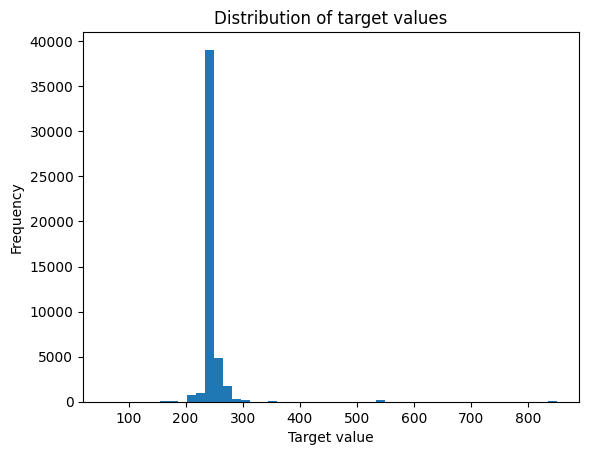

In [29]:
import matplotlib.pyplot as plt

plt.hist(y_balanced, bins=50)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


In [30]:
import numpy as np
from sklearn.utils import resample
import pandas as pd

# Copy original data and add target
df = X_balanced.copy()
df['y'] = y_balanced

# Bin the target into quantiles (drop duplicates if needed)
df['bin'] = pd.qcut(df['y'], q=5, duplicates='drop')

# Determine the balancing target: mean of bin sizes
bin_counts = df['bin'].value_counts()
target_count = int(bin_counts.mean())  # You could also use .median()

# Balance each bin
balanced_dfs = []

for b in df['bin'].unique():
    bin_df = df[df['bin'] == b]
    count = len(bin_df)
    
    if count > target_count:
        # Undersample majority bin
        df_bal = resample(
            bin_df,
            replace=False,
            n_samples=target_count,
            random_state=42
        )
    elif count < target_count:
        # Oversample minority bin
        df_bal = resample(
            bin_df,
            replace=True,
            n_samples=target_count,
            random_state=42
        )
    else:
        # Keep as-is
        df_bal = bin_df
    
    balanced_dfs.append(df_bal)

# Combine and shuffle
df_balanced = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Final split
X_balanced = df_balanced.drop(columns=['y', 'bin'])
y_balanced = df_balanced['y']


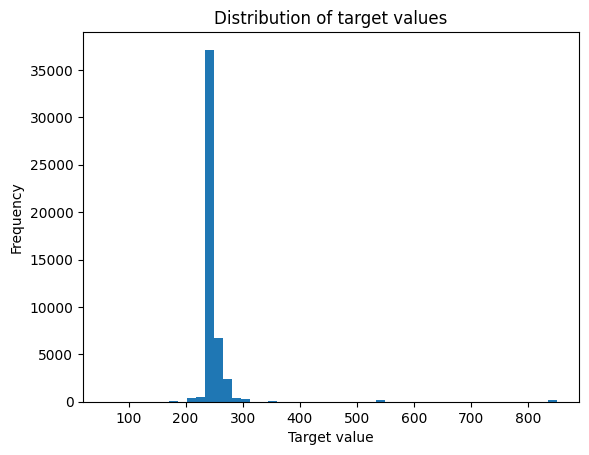

In [31]:
import matplotlib.pyplot as plt

plt.hist(y_balanced, bins=50)
plt.xlabel("Target value")
plt.ylabel("Frequency")
plt.title("Distribution of target values")
plt.show()


In [32]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

# Fit an initial logistic regression model
model = XGBRegressor( learning_rate=0.2,max_depth=7,min_samples_split=2, n_estimators=300,subsample=0.8 , objective='reg:squarederror' )
selector = RFE(estimator=model, n_features_to_select=20)
X_selected = selector.fit_transform(X_balanced, y_balanced)
print(selector.support_)  # Boolean mask of selected features
print(selector.ranking_)  # Ranking of features (1 is best)


C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } 

[ True False  True False False False False  True  True  True  True  True
  True False  True  True False False False False False False  True False
 False False False  True False False  True  True  True  True  True  True
 False False False  True  True False False False False False False]
[ 1  9  1 11 16 22  6  1  1  1  1  1  1 20  1  1 21 12  2 14 13  7  1 10
  3 17 23  1  5  8  1  1  1  1  1  1 19 18 24  1  1 28 27 26 25  4 15]


In [35]:
n=len(X_balanced.columns)
names=X_balanced.columns
print(names)

X_balanced.head()
for i in range(0,n):
    if ~selector.support_[i]:
        X_balanced= X_balanced.drop(names[i] , axis=1)

        


Index(['sbp', 'dbp', 'temperature', 'conductivity', 'uf', 'blood_flow',
       'gender', 'birthday', 'DM', 'weightstart', 'weightend', 'dryweight',
       'pulse', 'respiratory_rate', 'blood_oxygen_lvl', 'glucose_lvl',
       'hypotension', 'age', 'dialyzer', 'bath', 'technique', 'gain',
       'bath_temperature', 'replacement_Volume', 'kt', 'Bath_Flow',
       'bicarbonate_conductivity', 'arterial_Pressure', 'Venous_Pressure',
       'transmembrane_Pressure', 'avg_weekly_sessions', 'De_hour',
       'De_minutes', 'Ds_hour', 'Ds_minutes', 'session_year', 'session_month',
       'session_dayofweek', 'session_is_weekend', 'fd_year', 'fd_month',
       'year', 'month', 'dayofweek', 'is_weekend', 'hour', 'minutes'],
      dtype='object')


In [37]:
X_balanced.shape
X=X_balanced

In [38]:
X.columns

Index(['sbp', 'temperature', 'birthday', 'DM', 'weightstart', 'weightend',
       'dryweight', 'pulse', 'blood_oxygen_lvl', 'glucose_lvl',
       'bath_temperature', 'arterial_Pressure', 'avg_weekly_sessions',
       'De_hour', 'De_minutes', 'Ds_hour', 'Ds_minutes', 'session_year',
       'fd_year', 'fd_month'],
      dtype='object')

In [39]:
Y.unique()

array([240., 243., 259., 230., 233., 242., 232., 236., 229., 231., 246.,
       237., 235., 248., 273., 239., 217., 245., 238., 244., 203., 210.,
       216., 180., 251., 223., 218., 250., 241., 228., 234., 220., 214.,
       247., 227., 222., 249., 120., 226., 213., 252., 258., 254., 205.,
       300., 253., 224., 268., 270., 219., 221., 190., 262., 202., 260.,
       184., 256., 540., 211., 225., 207., 185., 212., 850., 263., 200.,
       204., 168., 174., 206., 188., 191., 171., 182., 183., 208., 215.,
       209., 255., 155., 167., 162., 153., 106., 150., 156., 144., 170.,
       141., 165., 124., 122., 169., 157., 151., 197., 179., 140., 154.,
       145., 186., 181., 277., 281., 269., 267., 264., 257., 261., 292.,
       279., 265., 346., 283., 280., 266., 275.,  60., 282., 315., 295.,
       291., 193., 360., 271., 840., 272., 199., 285.])

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# X_train=scaled_df1
models = {
    # 'LinearRegression': LinearRegression(),
    # 'Lasso': Lasso(),
    # 'Ridge': Ridge(),
    # 'ElasticNet': ElasticNet(),
    # 'RandomForest': RandomForestRegressor(),
    # 'KNN': KNeighborsRegressor(),
    'GradientBoostingRegressor' : XGBRegressor()
}

# Define hyperparameters for GridSearchCV
param_grid = {
    # 'LinearRegression': {},
    # 'Lasso': {'regressor__alpha': [0.1, 1.0, 10.0]},  # prefix with 'regressor__' for model inside pipeline
    # 'Ridge': {'regressor__alpha': [0.1, 1.0, 10.0]},  # prefix with 'regressor__' for model inside pipeline
    # 'ElasticNet': {'regressor__alpha': [0.1, 1.0, 10.0], 'regressor__l1_ratio': [0.1, 0.5, 0.9]},
    # 'RandomForest': {'regressor__n_estimators': [50, 100, 200], 
    #                  'regressor__max_depth': [5, 10, None], 
    #                  'regressor__min_samples_split': [2, 5, 10]},
    # 'KNN': {'regressor__n_neighbors': [3, 5, 10], 
    #         'regressor__weights': ['uniform', 'distance'], 
    #         'regressor__p': [1, 2]} , # p=1 for Manhattan, p=2 for Euclidean distance
    'GradientBoostingRegressor': {
                                    'regressor__n_estimators': [100, 200, 300,400,500,1000],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7,10],  # Correct usage of parameter with 'regressor__' prefix
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__subsample': [0.8, 1.0],
}
}

# Function to perform grid search for each model
best_models = {}

for name, model in models.items():
    # Create a pipeline without scaling, since the data is already scaled
    pipeline = Pipeline([
        ('regressor', model)  # Name the model step as 'regressor'
    ])
    
    # Setup GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model for each algorithm
    best_models[name] = grid_search.best_estimator_

# Now, you can compare the models' performance on the test set:
for name, model in best_models.items():
    score = model.score(X_test, y_test)
    print(f"{name} - R² score on test data: {score:.4f}")
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    print(f"{name} - RMSE score on test data: {rmse:.4f}")


GradientBoostingRegressor - R² score on test data: -0.0005
GradientBoostingRegressor - RMSE score on test data: 12.5908


C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
for name,model in best_models.items():
    print(model)

Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, min_samples_split=2,
                              missing=nan, monotone_constraints=None,
       

In [43]:
from xgboost import XGBRegressor

In [44]:
XGB = XGBRegressor( learning_rate=0.01,max_depth=3,min_samples_split=2, n_estimators=100,subsample=0.8 , objective='reg:squarederror',early_stopping_rounds=20, random_state=42 )

In [51]:

XGB.fit(X_train, y_train , eval_set=[(X_train, y_train),(X_test, y_test)])

[0]	validation_0-rmse:14.36387	validation_1-rmse:12.58805
[1]	validation_0-rmse:14.36217	validation_1-rmse:12.58803
[2]	validation_0-rmse:14.36166	validation_1-rmse:12.58802
[3]	validation_0-rmse:14.36113	validation_1-rmse:12.58806
[4]	validation_0-rmse:14.36049	validation_1-rmse:12.58807
[5]	validation_0-rmse:14.36000	validation_1-rmse:12.58806
[6]	validation_0-rmse:14.35921	validation_1-rmse:12.58809
[7]	validation_0-rmse:14.35874	validation_1-rmse:12.58805
[8]	validation_0-rmse:14.35823	validation_1-rmse:12.58808
[9]	validation_0-rmse:14.35787	validation_1-rmse:12.58805
[10]	validation_0-rmse:14.35762	validation_1-rmse:12.58809
[11]	validation_0-rmse:14.35742	validation_1-rmse:12.58816
[12]	validation_0-rmse:14.35693	validation_1-rmse:12.58816
[13]	validation_0-rmse:14.35637	validation_1-rmse:12.58815
[14]	validation_0-rmse:14.35606	validation_1-rmse:12.58818
[15]	validation_0-rmse:14.35490	validation_1-rmse:12.58819
[16]	validation_0-rmse:14.35438	validation_1-rmse:12.58818
[17]	va

C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py:386: UserWarning: [22:54:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, min_samples_split=2,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)

In [34]:
# Y.reset_index()

In [35]:
# X.reset_index()

In [83]:
# XGB.fit(X,Y)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, min_samples_split=2,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=300, n_jobs=None, ...)

In [56]:
score = XGB.score(X_test, y_test)
print(f"- R² score on test data: {score:.4f}")
rmse = np.sqrt(mean_squared_error(y_test, XGB.predict(X_test)))
print(f"- RMSE score on test data: {rmse:.4f}")

- R² score on test data: 0.9316
- RMSE score on test data: 3.5574


In [57]:
val_model = XGB

In [67]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
# Use KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use negative RMSE as a scoring function (because sklearn is annoying)
neg_rmse = make_scorer(mean_squared_error, greater_is_better=False)

# cross_val_score returns NEGATIVE MSE values, so we negate and sqrt for RMSE
scores = cross_val_score(val_model, X, Y, cv=kf, scoring=neg_rmse)
rmse_scores = np.sqrt(-scores)

print("RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py:386: UserWarning: [20:52:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  self.starting_round = model.num_boosted_rounds()
C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py:386: UserWarning: [20:52:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  self.starting_round = model.num_boosted_rounds()
C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py:386: UserWarning: [20:52:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_sam

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\sklearn.py", line 1247, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py", line 184, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py", line 267, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py", line 267, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\omarr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\callback.py", line 463, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.


In [68]:
test = val_model.predict(X_test)

In [69]:
check = y_test - test

In [70]:
y_test

26067    240.0
64025    240.0
23141    240.0
27060    241.0
18997    240.0
         ...  
18876    240.0
57997    243.0
54492    240.0
54837    240.0
57827    211.0
Name: Dialysis_Duration, Length: 9679, dtype: float64

In [71]:
test

array([239.2916 , 239.25995, 240.07481, ..., 241.19868, 239.98132,
       242.38962], dtype=float32)

In [72]:
check.shape

(9679,)

In [43]:
# y_test.describe()

In [73]:
check.describe()

count    9679.000000
mean        0.028326
std         3.557477
min       -87.035126
25%        -0.280685
50%         0.000763
75%         0.297836
max        68.003311
Name: Dialysis_Duration, dtype: float64

In [74]:
import joblib

# Sauvegarder le modèle
joblib.dump(val_model, 'xgb_earmy stopping.pkl')
print("Modèle enregistré sous le nom 'random_forest_model.pkl'.")

Modèle enregistré sous le nom 'random_forest_model.pkl'.
